<a href="https://colab.research.google.com/github/chm10/MO443/blob/master/projeto0/trabalho0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 3 de Introdução ao Processamento de Imagem Digital

**Nome:**Christian Hideki Maekawa  - **RA:** 231867

## 1 Introdução
O objetivo deste trabalho é realizar alguns processamentos básicos em imagens digitais. Quando pertinente, a vetorização de comandos deve ser empregada nas operações.


##2 O Programa
O programa foi implementado usando ubuntu 18.04 e python 3.6.9. As bibliotecas utilizadas para este trabalho foram numpy 1.18.5, opencv-python 4.1.2.30, matplotlib 3.2.2 e scipy 1.4.1

In [ ]:
!cat /etc/*release 

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [ ]:
!python --version

Python 3.6.9


###2.1 Como executar
O programa pode ser executado com o ambiente do Colab. `Shift` + `Enter` para cada célula ou com botão de executar.

Ou pode ser executado utilizando `!python <programa> <argumento>` utilizando o Colab.

# Código

## Download das imagens


In [ ]:
%%capture
!wget https://www.ic.unicamp.br/~helio/imagens_png/baboon.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/city.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/house.png
!wget https://www.ic.unicamp.br/~helio/imagens_png/seagull.png


## Bibliotecas utilizada

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2
from google.colab.patches import cv2_imshow

##1.1 Transformação de Intensidade

### 1.1.a Imagem Original

In [ ]:
img = cv2.imread("./city.png", cv2.COLOR_BGR2GRAY)

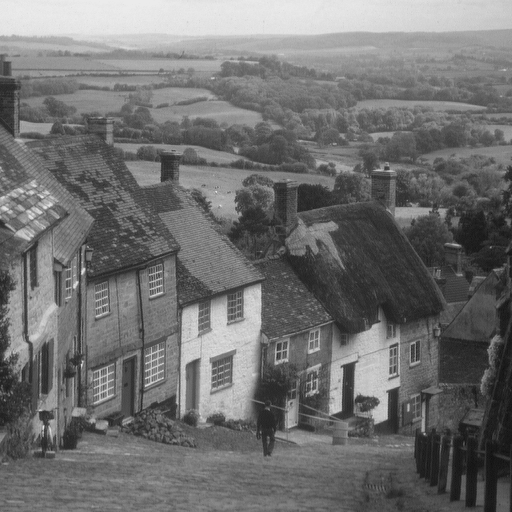

In [ ]:
cv2_imshow(img)

### 1.1.b Negativo da Imagem

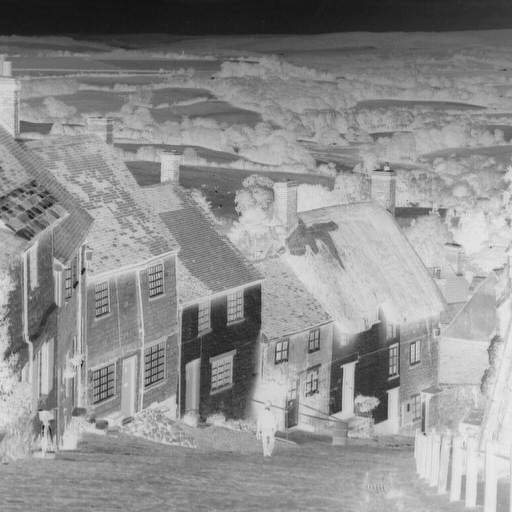

In [ ]:
img_invertida = 255 - img
cv2_imshow(img_invertida)

### 1.1.c Espelhamento Vertical 

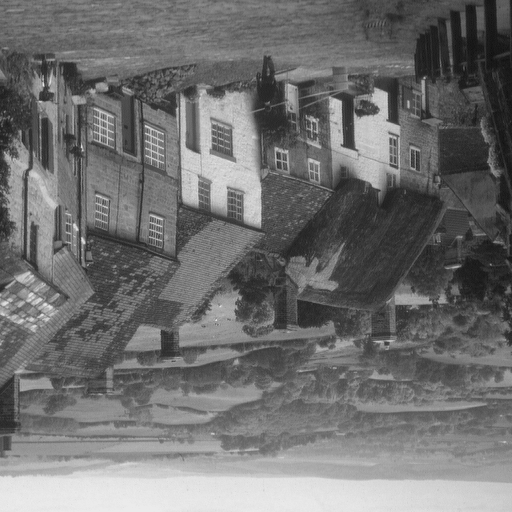

In [ ]:
img_espelhado_vertical = img[::-1]
cv2_imshow(img_espelhado_vertical)

###1.1 d Imagem Transformada

In [ ]:
def reduceIntesity(img,lowLim=100, highLim=200):
  img = img.astype(np.uint16)
  new_img = ((((highLim - lowLim) * img) / 255)  + lowLim).astype(np.uint8)
  return new_img

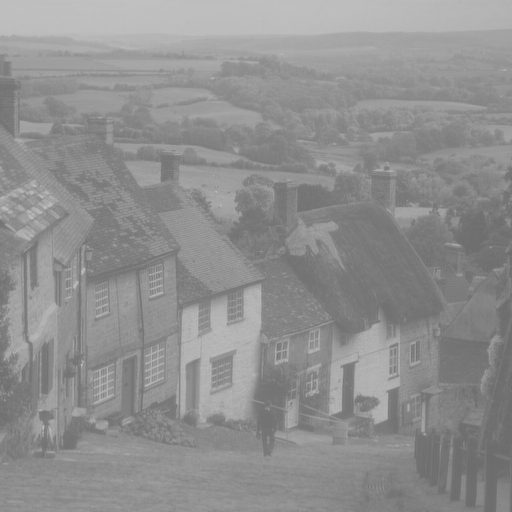

In [ ]:
reduced_img = reduceIntesity(img)
cv2_imshow(reduced_img)

### 1.1.e Linhas pares Invertidas

In [ ]:
def oddTransform(img):
  new_img = img.copy()
  for i in range(0,img.shape[0]):
    if i%2==0:
      new_img[i]=new_img[i][::-1]
  return new_img

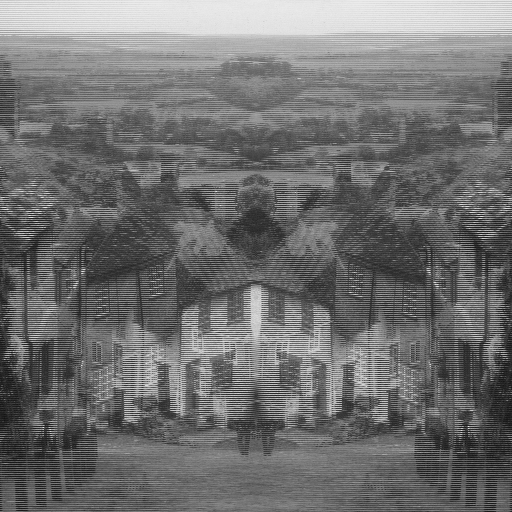

In [ ]:
odd_img = oddTransform(img)
cv2_imshow(odd_img)

###1.1.f Reflexão de linhas

In [ ]:
def verticalReflex(img):
  new_img = img.copy()
  for i in range(0,img.shape[1]):
    new_img[:,i][256:] = new_img[:,i][:255:-1]
  return new_img

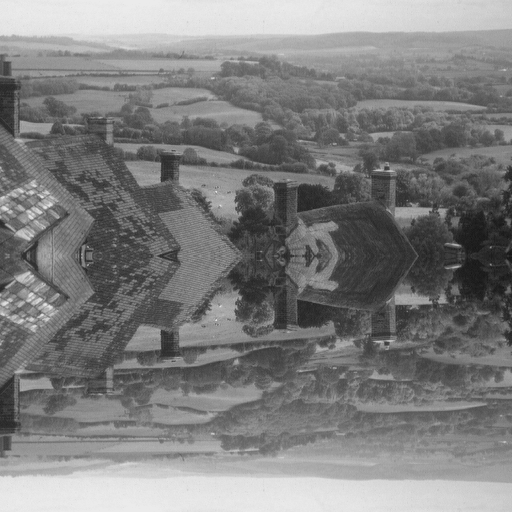

In [ ]:
vReflex_img = verticalReflex(img)
cv2_imshow(vReflex_img)

##1.2 Ajuste de Brilho

In [ ]:
img2 = cv2.imread("./baboon.png", cv2.COLOR_BGR2GRAY)

In [ ]:
def gammaProcess(fix_img,gamma):
  assert (fix_img.min() >=0.0) and (fix_img.max() <= 1.0), "Image must have scale between 0 and 1"
  return fix_img**(1/gamma)
   
def gammaAdjust(img,gamma,lowLim=0, highLim=1):
  img = img.astype(np.float16).copy()
  new_img = (img / 255).astype(np.float16)
  new_img = gamaAdjust(new_img,gamma)
  new_img =  new_img*255
  return new_img

### 1.2.a Imagem Original

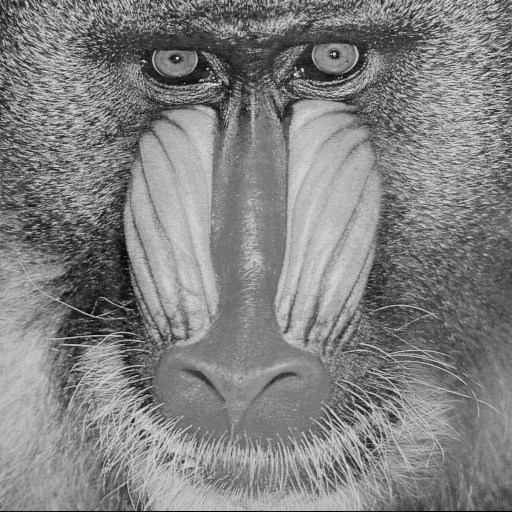

In [ ]:
cv2_imshow(img2)

1.2.b Gamma 1.5

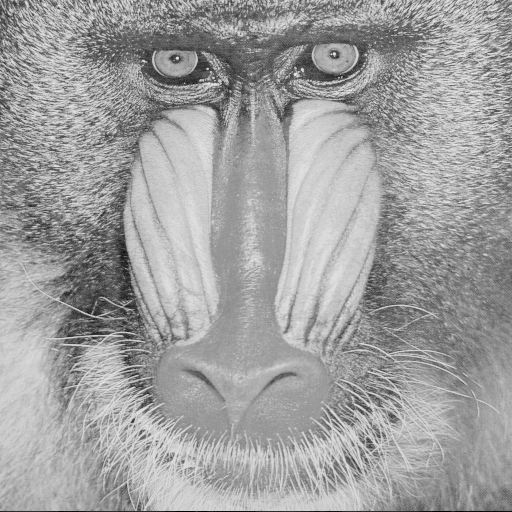

In [ ]:
gammaApplied = gammaAdjust(img2,1.5)
cv2_imshow(gammaApplied)

### 1.2.c Gamma 2.5

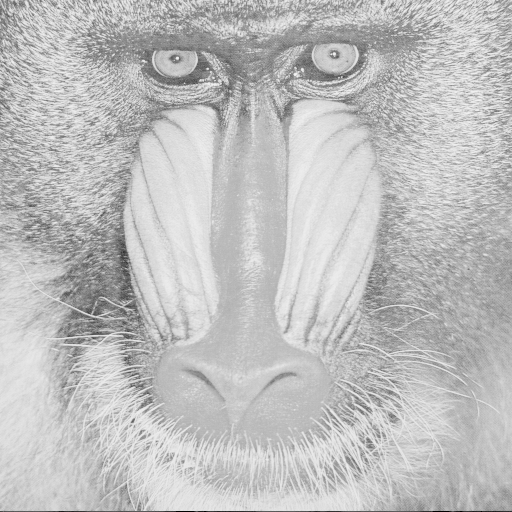

In [ ]:
gammaApplied = gammaAdjust(img2,2.5)
cv2_imshow(gammaApplied)

### 1.2.d Gamma 3.5

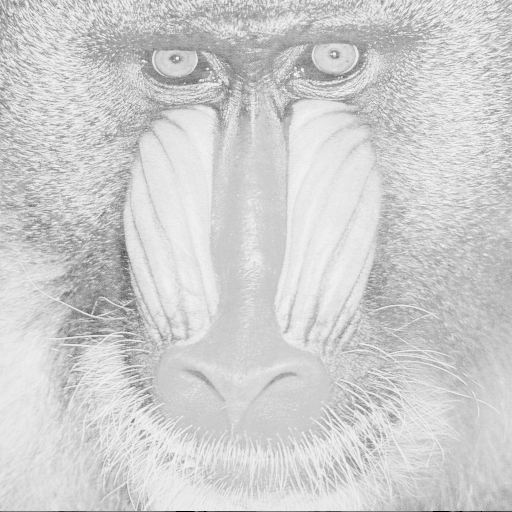

In [ ]:
gammaApplied = gammaAdjust(img2,3.5)
cv2_imshow(gammaApplied)

##1.3 Plano de Bits

In [ ]:
def applyMask(img,mask):
  assert (mask>= 0) and (mask <=7), "Mask need to be between 0x0 (0) and 0xF (15)"
  lmask = 7
  mymask = ""
  while lmask >= 0:
    if mask == lmask:
      mymask += '1'
    else:
      mymask += '0'
    lmask-=1
  print(mymask)
  return ((img&int(mymask,2))*255).astype(np.uint8)

### 1.3.a Imagem Original

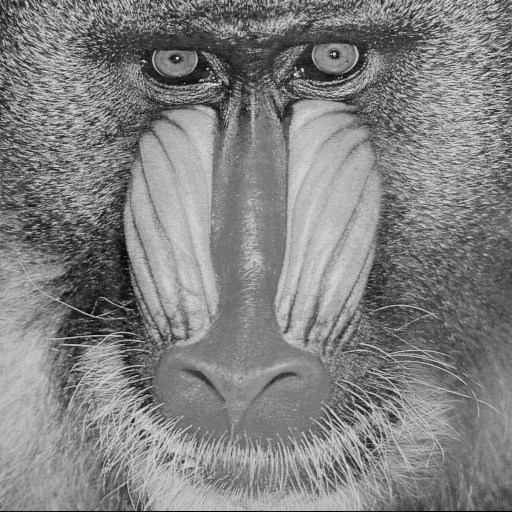

In [ ]:
cv2_imshow(img2)

10000000


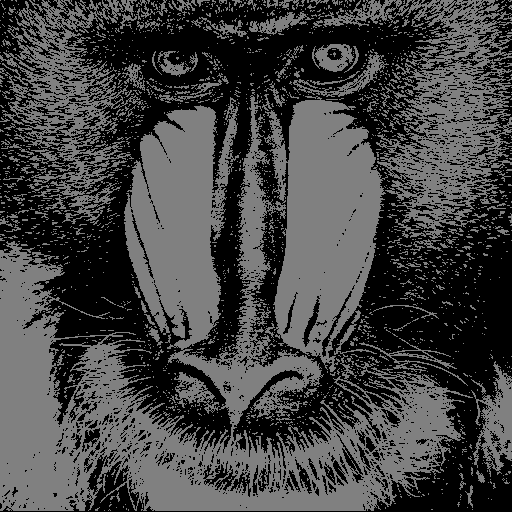

In [ ]:
img_plan0 = applyMask(img2,7)
cv2_imshow(img_plan0)

In [ ]:
(230&254)*255

58650